<a href="https://colab.research.google.com/github/Vishalbangari/Spark-Foundation-tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Author -Bangari Vishal**

### **GRIP - The Sparks Foundation**

### **Data Science and Bussiness Analytics Intern**


### **Task 1 : Prediction using Supervised ML**

#### This dataset aims to predict the percentage of average rate of no. of study hours of the student.In this task we have two variables feature is the no.of hours studied and the target value is the percentage score.By using this dataset we have to predict the score if a student studies for 9.25 hrs/ day



In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)


df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **Exploring Data**

In [ ]:
df.shape

(25, 2)

#### **So, here there are 25 number of rows, 2 columns**

#### **The Count, Mean, Standard Deviation, Minimum Value, Maximum Value, 25%, 50%, 75% values are shown below:**

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### To check whether there is presence of any NULL values in the data

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### **This gives us the information that there is no presence of null values in both and the data types of Hours is float where as Scores is of int type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### **Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

In [ ]:
df.corr()


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000



### From above plot, it is concluded that there is a liner relationship between the Hours and scores.

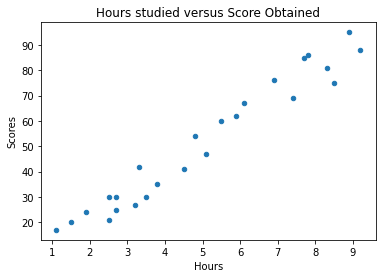

In [ ]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores');
plt.title('Hours studied versus Score Obtained')
plt.show()

### **By observing the above plot it is clearly in the form of a linear way (the points that got plotted are in the line format type). So, we can consider that there is a positive linear relation between the number of hours studied and percentage of score.**

### Training and testing the model

In [ ]:
x=(df['Hours'].values).reshape(-1,1)
y=df['Scores'].values

In [ ]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [ ]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print('splitting is done')

splitting is done


In [ ]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
print('Training is done')

Training is done


In [ ]:
print('Intercept value is:',regressor.intercept_)
print('Linear coefficient is:',regressor.coef_)

Intercept value is: 2.018160041434662
Linear coefficient is: [9.91065648]


In [ ]:
y_pred = regressor.predict(x_test)
x_pred = regressor.predict(x_train)


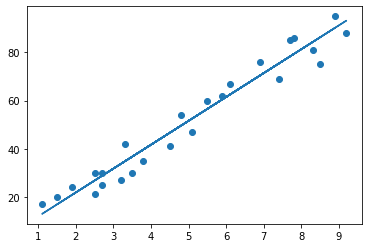

In [ ]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
#To predict scores of testing data
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
x_pred = regressor.predict(x_train)
x_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [ ]:
df = pd.DataFrame({'Actual': y_train, 'Predicted' : x_pred})
df.head()

,Actual,Predicted
0,35,39.678655
1,24,20.848407
2,86,79.321281
3,76,70.401690
4,17,12.919882


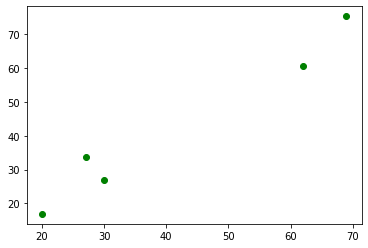

In [ ]:
plt.scatter(y_test,y_pred,c='green')
plt.show()

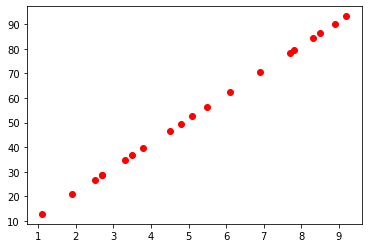

In [ ]:
plt.scatter(x_train,x_pred,c = 'red')
plt.show()

In [ ]:
hours=9.25
pred_score=regressor.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Predicted Score = {}".format(pred_score[0]))

Number of hours = 9.25
Predicted Score = 93.69173248737539


##Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
